## MATERIAL DE APRENDIZADO PARA A RN

In [1]:
import newspaper # Biblioteca que analisa noticias com suporte a Natural Language Processing em Português
import time # Habilita um delay entre os crawls/scraps para que não sufoque os sites acessados, acarretando bloqueio.
from newspaper import Article

In [2]:
kw_list = [] # cria uma lista em branco

fileHandle = open('train_news.csv','r') #Opens the log file of interest
url_news = fileHandle.readlines() #reads the logfile contents into memory as a list
fileHandle.close() # fecha o arquivo para não travar a proxima abertura

In [112]:
def get_kw(url):
    article = Article(url, fetch_images=False) # Leitura de artigos individualmente, e não baixa as imagens.
    article.download() # baixa
    article.parse() # prepara
    article.nlp() # processa
    #print(article.title)
    #print(article.publish_date)
    #print(article.keywords)
    kw_list.append(article.keywords) # concatena as keywords na lista criada anteriormente
    time.sleep(5) 

In [4]:
for url in url_news: # para cada url no arquivo lido
    url = url.strip() # corta as pontas do link, removendo quebra-linhas e espaços
    get_kw(url) # chama a função para extrair kw de cada url
    #print("done with: ",url)
print("done!")

done!


In [32]:
# kw_list resulta em uma lista de listas. abaixo os elementos são listados em uma única lista.
# exemplo: [[1,2,3],[4,5,6],[7,8,9]] --> [1,2,3,4,5,6,7,8,9]

def kw_clear():
    kw_learn=[] # lista utilizável para aprendizado, já limpa e organizável
    for kw in kw_list: # para cada lista de kw, na lista de listas de kws.
        for sub_kw in kw: # para cada kw dentro da lista de kws.
            kw_learn.append(sub_kw)
            print(kw_learn)
    return sorted(kw_learn,key=kw_learn.count,reverse=True) # ordena as kw por ordem de frequência de aparecimento nas noticias
kw_learn = kw_clear();

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
## Salva as KW para análise posterior
with open('kw_learn.txt', 'w') as f:
    for item in kw_learn:
        f.write("%s\n" % item)
    f.close()

Análise das Keywords

In [166]:
## Abre as KW
fileHandle = open('kw_learn.txt', 'r')
kw_learn = fileHandle.readlines()
fileHandle.close()

In [30]:
kw_learn = kw_clear();

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
import collections
a = kw_learn
counter=collections.Counter(a)
#print(counter)
#print(counter.values())
#print(counter.keys())
print(counter.most_common(50))

[('em', 62), ('disparo', 59), ('que', 54), ('um', 45), ('da', 44), ('foi', 42), ('por', 38), ('uma', 34), ('arma', 28), ('é', 27), ('fogo', 25), ('polícia', 23), ('com', 22), ('para', 18), ('homem', 15), ('não', 15), ('os', 13), ('vítima', 13), ('após', 12), ('anos', 11), ('acidental', 11), ('jovem', 10), ('ao', 9), ('morre', 9), ('tiros', 8), ('se', 8), ('atingido', 8), ('ser', 8), ('armas', 7), ('atingida', 7), ('estava', 6), ('ele', 6), ('diz', 6), ('tiro', 6), ('policiais', 6), ('policial', 6), ('criança', 6), ('à', 6), ('militar', 6), ('mulher', 6), ('quando', 5), ('mãe', 5), ('morto', 5), ('durante', 5), ('rua', 5), ('preso', 4), ('onde', 4), ('ela', 4), ('sul', 4), ('rio', 4)]


In [156]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

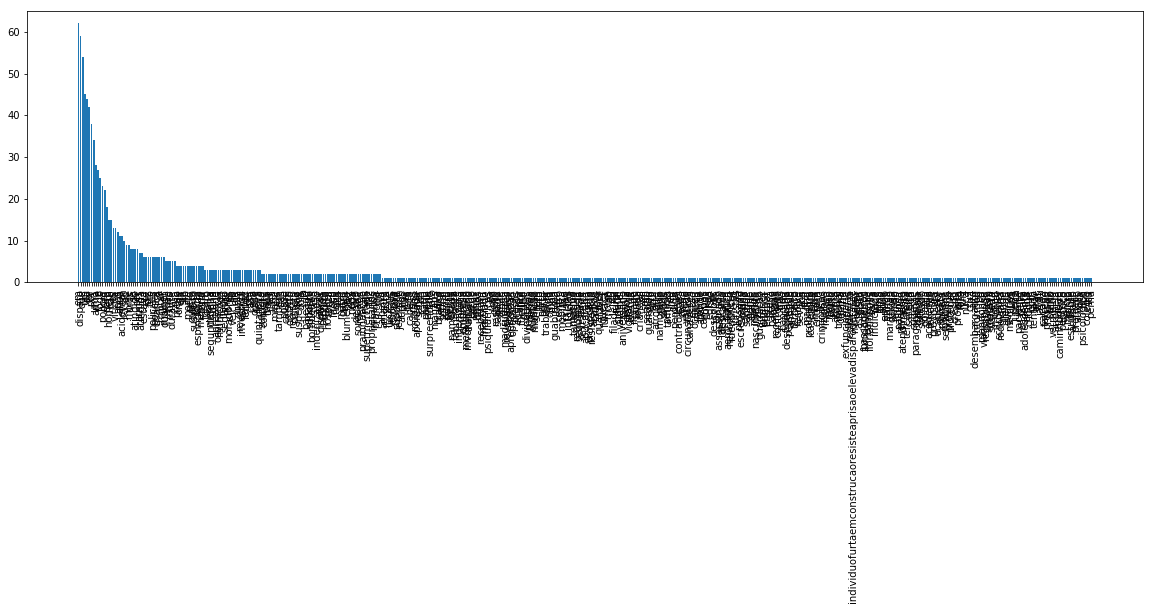

In [157]:
a = counter
plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.bar(range(len(a)), list(a.values()), align='center')
plt.xticks(range(len(a)), list(a.keys()))
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.show()

In [171]:
## Separa a tupple gerada pela selecao de 50 palavras mais comuns em duas listas

i=0
words=[]
occurrences=[]
a = counter.most_common(50) # Pega as 50 palavras mais comuns
for i in range(len(a)):
    words.append(a[i][0])
    occurrences.append(a[i][1])
#print(words)
#print(occurrences)

['em', 'disparo', 'que', 'um', 'da', 'foi', 'por', 'uma', 'arma', 'é', 'fogo', 'polícia', 'com', 'para', 'homem', 'não', 'os', 'vítima', 'após', 'anos', 'acidental', 'jovem', 'ao', 'morre', 'tiros', 'se', 'atingido', 'ser', 'armas', 'atingida', 'estava', 'ele', 'diz', 'tiro', 'policiais', 'policial', 'criança', 'à', 'militar', 'mulher', 'quando', 'mãe', 'morto', 'durante', 'rua', 'preso', 'onde', 'ela', 'sul', 'rio']
[62, 59, 54, 45, 44, 42, 38, 34, 28, 27, 25, 23, 22, 18, 15, 15, 13, 13, 12, 11, 11, 10, 9, 9, 8, 8, 8, 8, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4]


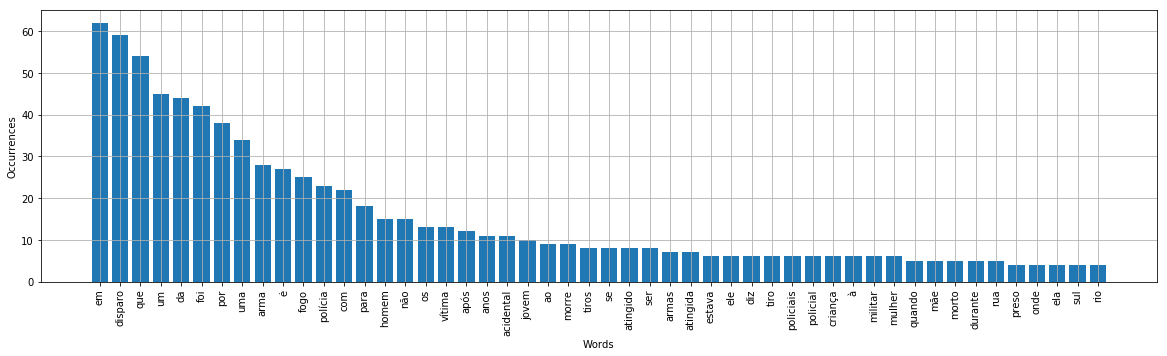

In [176]:
## Analise visual da ocorrencia de palavras

plt.figure(figsize=(20, 5)) # ajusta tamanho do grafico plotado
plt.subplot(111) # coordenadas do grafico a ser plotado.
plt.bar(words,occurrences)
plt.tick_params(axis='x', rotation=90) # roda em 90 graus os parametros em x para possibilitar a leitura
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.grid()
plt.show()